<a href="https://colab.research.google.com/github/Joshua-Dias-Barreto/CIFAR10-using-CNNs/blob/main/Cifar10ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cifar10 using Convolutional Neural Networks( CNN's )**

**Objective :**

The aim of this project is to construct and train a Convolutional Neural Network(CNN) on thousands of images of  airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships and trucks so that it may successfully identify others when presented. The data that will be incorporated is the Cifar10 dataset which contains 50,000 images for training and 10,000 test images. The Convolutional Neural Network will be constructed using Keras Python API with TensorFlow as the backend.

# Importing the necessary packages :

In [ ]:
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras import Sequential


# **CIFAR10 Dataset :**
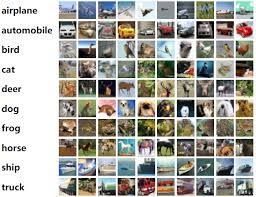

# Loading the dataset from keras.datasets

In [ ]:
(X_train,Y_train),(X_test,Y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


# Dimensions of the dataset :

It can be seen that X_train has dimensions (50000, 32, 32, 3).

This signifies that there are 50,000 images specified with 32 x 32 pixels.

The 3 at the end signifies that these are coloured images (RGB).

In [ ]:
print("X_train shape ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_train shape ",X_test.shape)
print("Y_train shape ",Y_test.shape)

X_train shape  (50000, 32, 32, 3)
Y_train shape  (50000, 1)
X_train shape  (10000, 32, 32, 3)
Y_train shape  (10000, 1)


# Printing the 20,000th image from the training dataset :

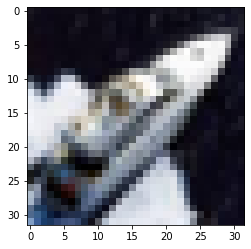

In [ ]:
plt.imshow(X_train[20000])

In [ ]:
Y_train[20000]

array([8], dtype=uint8)

In [ ]:
image_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"];

# Printing the Unique Elements in Y_train and Y_test

In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


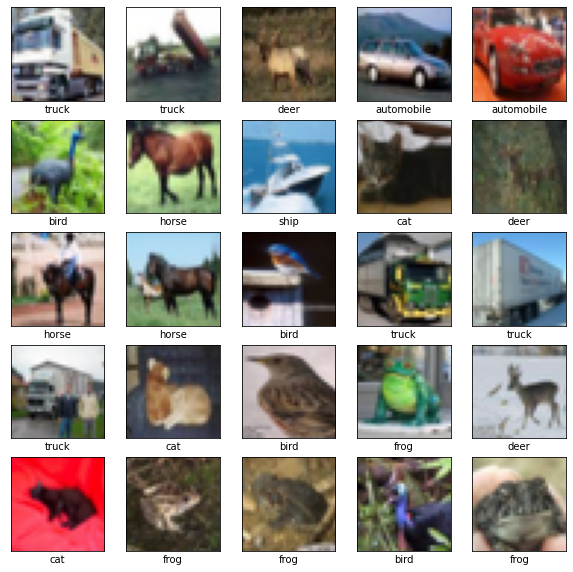

In [ ]:
plt.figure(figsize=[10,10]);
for i in range(1,26):
 plt.subplot(5,5,i)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(X_train[i])
 plt.xlabel(image_names[Y_train[i][0]])
plt.show()

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255
num_classes=10
Y_train=np_utils.to_categorical(Y_train,num_classes)
Y_test=np_utils.to_categorical(Y_test,num_classes)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,stratify=Y_train)

In [ ]:
# Creating a sequential model and adding layers to it
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                    

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
network_history=model.fit(X_train, Y_train,
          batch_size=128, epochs=100,
          verbose=1,validation_data=(X_val,Y_val))

Epoch 1/100
293/293 [==============================] - 5s 16ms/step - loss: 0.4665 - accuracy: 0.8359 - val_loss: 0.5753 - val_accuracy: 0.8017
Epoch 2/100
293/293 [==============================] - 4s 15ms/step - loss: 0.4337 - accuracy: 0.8455 - val_loss: 0.5479 - val_accuracy: 0.8118
Epoch 3/100
293/293 [==============================] - 4s 15ms/step - loss: 0.4095 - accuracy: 0.8539 - val_loss: 0.5986 - val_accuracy: 0.7997
Epoch 4/100
293/293 [==============================] - 4s 15ms/step - loss: 0.3939 - accuracy: 0.8583 - val_loss: 0.5808 - val_accuracy: 0.8060
Epoch 5/100
293/293 [==============================] - 4s 15ms/step - loss: 0.3832 - accuracy: 0.8635 - val_loss: 0.5775 - val_accuracy: 0.8091
Epoch 6/100
293/293 [==============================] - 4s 15ms/step - loss: 0.3580 - accuracy: 0.8734 - val_loss: 0.6679 - val_accuracy: 0.7986
Epoch 7/100
293/293 [==============================] - 4s 15ms/step - loss: 0.3502 - accuracy: 0.8763 - val_loss: 0.6132 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.1535 - accuracy: 0.7780
Test score: 1.1535383462905884
Test accuracy: 0.777999997138977
